Um exemplo simples em Python que demonstra como um único neurônio pode aprender. O código vai incluir:

1. Um dataset fictício.

2. A possibilidade de escolher entre diferentes funções de ativação (Sigmóide, ReLU e Tangente Hiperbólica).

3. Um loop de treinamento onde o neurônio ajusta seus pesos para minimizar o erro.

In [3]:
#################################################
# Desenvolvido por Arthur Lima e Renan Gomes
#################################################

import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Definimos o tamanho do nosso novo dataset
num_samples = 50

# Dataset customizado (Problema da paridade)
X = np.random.randint(0, 2, size=(num_samples, 3))

# Calculamos a saida de paridade (o resultado é 1 se houver um número ímpar de 1s)
# A maneira mais facil de fazer isso é com o operador XOR (^)
y = np.logical_xor(X[:, 0], np.logical_xor(X[:, 1], X[:, 2])).reshape(-1, 1)
# Convertendo booleano para inteiro (0 ou 1)
y = y.astype(int)


# Parametros
learning_rate = 0.1
epochs = 50000

# Arquitetura da rede
input_neurons = 3  # Entradas: X1, X2, X3
hidden_neurons = 4 # Neuronios camada oculta
output_neurons = 1 # Saida: 0 ou 1

# Inicialização de Pesos
np.random.seed(42)

# Pesos entre a camada de entrada e a camada oculta: (3x4)
weights_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))

# Pesos entre a camada oculta e a camada de saída: (4x1)
weights_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Escolha da função de ativação
activation_function = sigmoid
activation_derivative = sigmoid_derivative

errors = []
for epoch in range(epochs):
    # Forward Pass
    # Output da camada oculta
    hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden # output -> (50X4)
    hidden_layer_output = activation_function(hidden_layer_input) # output -> (50X4)

    # Output final da rede
    output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output # -> (50x1)
    predicted_output = activation_function(output_layer_input) # -> (50x1)

    # Cálculo do Erro
    error = y - predicted_output # -> (50x1)
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada de saida (previsao)
    d_predicted_output = error * activation_derivative(predicted_output) # -> (50x1)

    # Erro da camada oculta (propaga o erro para trás)
    error_hidden_layer = d_predicted_output.dot(weights_output.T) # -> (50X4)
    d_hidden_layer = error_hidden_layer * activation_derivative(hidden_layer_output)

    # Update weights
    # Camada de saida
    weights_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate # (4x1)
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate # (1x1)

    # Camada oculta
    weights_hidden += X.T.dot(d_hidden_layer) * learning_rate # (3x4)
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate # (1x4)

    if epoch % 5000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.34306601938590897
Época 5000, Erro: 0.17533678072799183
Época 10000, Erro: 0.19909449499198476
Época 15000, Erro: 0.284129668719674
Época 20000, Erro: 9.010435828529513e-05
Época 25000, Erro: 1.4602372730988354e-06
Época 30000, Erro: 4.85734381094262e-07
Época 35000, Erro: 2.7593696085164923e-07
Época 40000, Erro: 2.1074302467628532e-07
Época 45000, Erro: 1.9206954546333252e-07


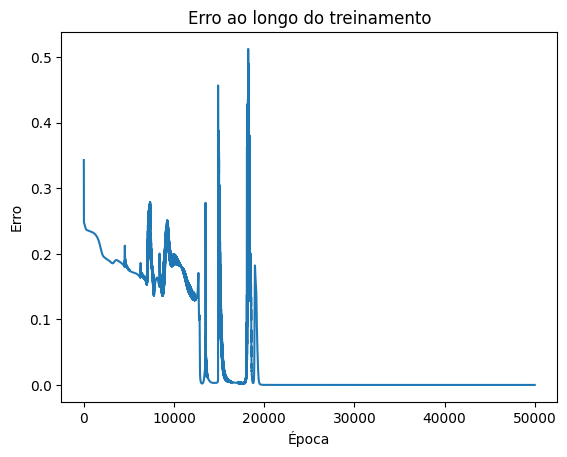


Testando a rede com todas as 8 combinações possíveis
Entrada: [0 0 0] -> Saída Esperada: 0 -> Saída da Rede: 0.0002 (Classe: 0)
Entrada: [0 0 1] -> Saída Esperada: 1 -> Saída da Rede: 1.0000 (Classe: 1)
Entrada: [0 1 0] -> Saída Esperada: 1 -> Saída da Rede: 0.9995 (Classe: 1)
Entrada: [0 1 1] -> Saída Esperada: 0 -> Saída da Rede: 0.0000 (Classe: 0)
Entrada: [1 0 0] -> Saída Esperada: 1 -> Saída da Rede: 0.9994 (Classe: 1)
Entrada: [1 0 1] -> Saída Esperada: 0 -> Saída da Rede: 0.0000 (Classe: 0)
Entrada: [1 1 0] -> Saída Esperada: 0 -> Saída da Rede: 0.0010 (Classe: 0)
Entrada: [1 1 1] -> Saída Esperada: 1 -> Saída da Rede: 0.9997 (Classe: 1)


In [4]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()


# Teste da Rede Treinada
print("\nTestando a rede com todas as 8 combinações possíveis")

test_data = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
# SaIda esperada (paridade/XOR)
expected_output = np.array([0, 1, 1, 0, 1, 0, 0, 1])

for i, test_input in enumerate(test_data):
    # Executa o forward pass para o dado de teste
    hidden_layer = sigmoid(np.dot(test_input, weights_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden_layer, weights_output) + bias_output)

    # Arredonda o resultado para obter a classe (0 ou 1)
    predicted_class = 1 if output > 0.5 else 0

    print(f"Entrada: {test_input} -> Saída Esperada: {expected_output[i]} -> Saída da Rede: {output[0][0]:.4f} (Classe: {predicted_class})")
